# Simple Linear Regression Using Scikit Learn

### Author: Shreeya Parikh

## Problem Statement : What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Understanding the data

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape

(25, 2)

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Checking for empty values

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### As we can see the dataset is completely clear of null/ empty values.

# Visualizing the dataset

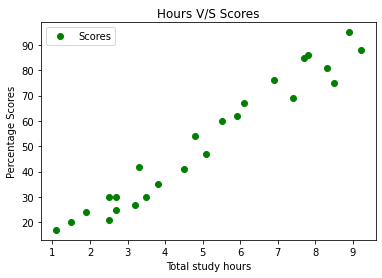

In [19]:
data.plot(x='Hours',y='Scores',style='og')
plt.title('Hours V/S Scores')  
plt.xlabel('Total study hours')  
plt.ylabel('Percentage Scores')  
plt.show()

### We can infer from the above graph that as the study hours increases, the score increases as well, hence, we have a positive correlation for the dataset.

In [21]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [22]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
## We have split our dataset into training set and testing sets, which will help us to perform linear regression on them.

## Training the Algorithm

In [25]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

### We need to find the values of the intercepts and the slope of the linear regression line. Its' equation is y=mX+c, where X is the indepedent/explanatory variable and y is the dependent variable. m is the slope and c is the intercept of the line.

In [27]:
intercept=print(regressor.intercept_)
slope=print(regressor.coef_)

2.018160041434683
[9.91065648]


## Our linear regression model is: y=9.91X+2.01

### Now we will plot them on the graph

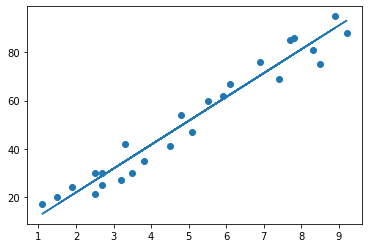

In [29]:
# Plotting the regression line
line_eq = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line_eq);
plt.show()

## Predicting the model

In [31]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [32]:
y_pred = regressor.predict(X_test) 

In [35]:
predicted=regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})  
df['error']=df['Actual']-df['Predicted']
df['error_percent']=(df['error']/df['Actual'])*100
df

,Actual,Predicted,error,error_percent
0,20,16.884145,3.115855,15.579276
1,27,33.732261,-6.732261,-24.934299
2,69,75.357018,-6.357018,-9.213070
3,30,26.794801,3.205199,10.683996
4,62,60.491033,1.508967,2.433817


In [36]:
hours=[[9.25]]
pred=regressor.predict(hours)
pred

array([93.69173249])

### It can be infered that if a student studies for 9.25 hours/day, the score would be 93.6

## Evaluating the perfomance of the model

### This evaluation will determine how well our model has been performing and how close the results are to the actual results from the training data.

In [38]:
#mean_squared_error
from  sklearn.metrics import mean_squared_error
exp=df['Actual']
predicted=df['Predicted']
errors=mean_squared_error(exp,predicted,squared=False)
print(errors)

4.6474476121003665


In [39]:
#mean absolute error
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

MAE: 4.183859899002975



### The above calculation shows that the our linear regression model works better than the MAE metrics.